In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os,shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
import zipfile
z=zipfile.ZipFile('D:/Code/excel&csv/archive.zip')
z.extractall()

In [3]:
folder='D:/Code/excel&csv/brain_tumor_dataset/yes/'
count=1
for filename in os.listdir(folder):
    source=folder+filename
    destination=folder+"Y_"+str(count)+".jpg"  #Y_1 ......Y_n
    os.rename(source,destination)
    count+=1
print("All files are rename inside the yes dict")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Code/excel&csv/brain_tumor_dataset/yes/Y_10.jpg' -> 'D:/Code/excel&csv/brain_tumor_dataset/yes/Y_2.jpg'

In [7]:
folder='D:/Code/excel&csv/brain_tumor_dataset/no/'
count=1
for filename in os.listdir(folder):
    source=folder+filename
    destination=folder+"N_"+str(count)+".jpg"  #Y_1 ......Y_n
    os.rename(source,destination)
    count+=1
print("All files are rename inside the no dict")

All files are rename inside the no dict


In [8]:
# EDA(Exploratory Data Analysis)

In [4]:
listyes=os.listdir('D:/Code/excel&csv/brain_tumor_dataset/yes/')
number_files_yes=len(listyes)
print("yes cancer image=",number_files_yes)

listno=os.listdir('D:/Code/excel&csv/brain_tumor_dataset/no/')
number_files_no=len(listno)
print("no cancer image=",number_files_no)


yes cancer image= 155
no cancer image= 98


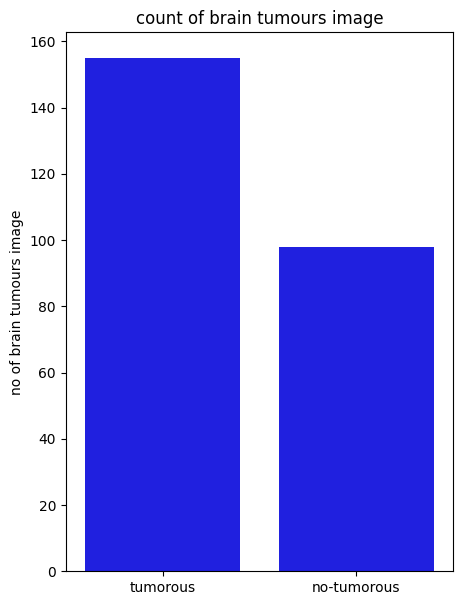

In [5]:
dict={"tumorous":number_files_yes,"no-tumorous":number_files_no}
key=dict.keys()
value=dict.values()

fig=plt.figure(figsize=(5,7))
sns.barplot(x=key,y=value,color="blue")
plt.ylabel("no of brain tumours image")
plt.title("count of brain tumours image")
plt.show()

In [6]:
# Data Argumentation
# yes=155 and no="98"
# imbalance

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import os

In [8]:
# Define paths
train_dir = 'D:/Code/excel&csv/brain_tumor_dataset'  # Folder containing "yes" and "no" subfolders


In [9]:
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Create training and validation data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to a common size
    batch_size=50,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=50,
    class_mode='binary',
    subset='validation'
)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [10]:

# Build the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define the model using Sequential
model = Sequential([
    Input(shape=(150, 150, 3)),  # Specify the input shape using Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

C:\Users\NKIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 882ms/step - accuracy: 0.5610 - loss: 1.1777 - val_accuracy: 0.6400 - val_loss: 0.6463
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 746ms/step - accuracy: 0.6503 - loss: 0.6152 - val_accuracy: 0.8000 - val_loss: 0.4048
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 758ms/step - accuracy: 0.7901 - loss: 0.4989 - val_accuracy: 0.7800 - val_loss: 0.4032
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 748ms/step - accuracy: 0.7869 - loss: 0.5147 - val_accuracy: 0.8800 - val_loss: 0.4587
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 758ms/step - accuracy: 0.8197 - loss: 0.4806 - val_accuracy: 0.7800 - val_loss: 0.4449
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 750ms/step - accuracy: 0.8034 - loss: 0.4331 - val_accuracy: 0.8200 - val_loss: 0.3983
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 709ms/step - accuracy: 0.8569 - loss: 0.3860 - val_accuracy: 0.8200 - val_loss: 0.4049
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 761ms/step - accuracy: 0.8804 - loss: 0.3173 - val_accuracy: 0.8800 - val_loss:

In [12]:
# Function to predict from a single image

# Save the trained model
model.save("brain_tumor_classifier_model.h5")
def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Scale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Prediction: Cancer detected")
    else:
        print("Prediction: No cancer detected")


In [13]:
# Load the model and predict
model = tf.keras.models.load_model('brain_tumor_classifier_model.h5')
image_path = "D:/Code/excel&csv/brain_tumor_dataset/yes/Y_12.jpg"  # Replace with the path to your test image
predict_image(image_path,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Prediction: Cancer detected
